# Practice


In [22]:
import numpy as np
import pandas as pd
import pickle
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn import metrics
import matplotlib.pyplot as pyplot

In [38]:
data = pd.read_csv('./cardata/audi.csv', sep=',', skipinitialspace=True)
data = data[["model", "year", "price", "transmission", "mileage", "fuelType", "engineSize"]]
predict = "price"

noOfDummyColumns = pd.Series.nunique(data["model"]) + pd.Series.nunique(data["transmission"]) + pd.Series.nunique(data["fuelType"])
df = pd.get_dummies(data, columns=['model', 'transmission', 'fuelType'], prefix="dmy")

X = np.array(df.drop([predict], 1))
y = np.array(df[predict])


# df.info()
# print("Initial data: ")
# print(data.drop([predict], 1).keys()) # prints all model fields needed for every manufacturer
print (noOfColumns)
# print("\n\n")
print("Data after applying One-hot Encoding: ")
print(len(df.drop([predict], 1).keys())) # prints all model fields needed for every manufacturer


31
Data after applying One-hot Encoding: 
34


/var/folders/j9/fq1b23t51hg4frkf5917rh3r0000gn/T/ipykernel_9264/506764126.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop([predict], 1))
/var/folders/j9/fq1b23t51hg4frkf5917rh3r0000gn/T/ipykernel_9264/506764126.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  print(len(df.drop([predict], 1).keys())) # prints all model fields needed for every manufacturer


In [18]:
best = 0
for _ in range(1000):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    if acc > best:
        best = acc
        with open("audimodel.pickle", "wb") as f:
            pickle.dump(linear, f)
print(best)

pickle_in = open("audimodel.pickle", "rb")
linear = pickle.load(pickle_in)

0.8861585790688731


In [23]:
# print('Coefficient: \n', linear.coef_)
# print('Intercept: \n', linear.intercept_)
# print(x_test.shape, y_test.shape)
# print(x_train.shape, y_train.shape)
predictions = linear.predict(x_test)
for x in range(len(predictions)):
    # print(predictions[x], y_test[x], x_test[x])
    print(round(predictions[x]), y_test[x])
r2 = metrics.r2_score(y_test, predictions)
mean_sqrd_error = metrics.mean_squared_error(y_test, predictions)
root_mean_sqrd_error = np.sqrt(mean_sqrd_error)

print('r2 score is: ', r2)
print('mean_sqrd_error score is: ', mean_sqrd_error)
print('root_mean_sqrd_error score is: ', root_mean_sqrd_error)


14684 14850
22632 18896
18490 17940
23766 22490
23331 17199
10989 12800
17861 18298
26903 24290
28481 26950
12288 10800
29344 26250
47098 44990
9193 10790
30051 27450
28325 26000
24478 20991
13520 14470
14711 13298
10982 12498
5080 8488
47302 46990
32169 33995
28853 32788
20571 18499
18859 17498
-9606 3995
14480 13498
19634 16650
11619 13240
6017 9750
34170 31395
32480 45990
32033 32880
19190 14480
22306 32000
11529 11950
29443 30000
15124 14890
25136 36490
81398 54850
27984 28990
31207 27995
26405 23990
28677 25946
46539 46990
27141 22990
28607 27990
30176 30490
6641 8950
33898 31100
19058 19000
28360 28500
32907 23195
30184 32500
21035 19995
49473 54990
17579 18962
21288 17520
28726 27990
20827 20000
26548 29990
60623 64990
20946 21111
6809 10398
22698 19751
12172 13990
13753 16400
9379 10249
15754 13398
31535 37990
24284 23950
22906 20000
23859 20799
20084 18995
19456 16000
21096 19926
29334 32995
24977 24450
28976 24985
49834 52990
25733 22690
22893 26900
26433 26073
29022 34950
99

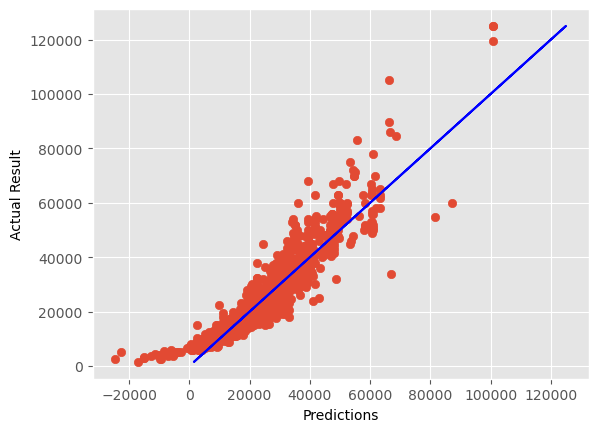

In [24]:
p = 'Predictions'
pyplot.style.use("ggplot")
pyplot.scatter(predictions, y_test)
pyplot.plot(y_test,y_test,color='blue')
pyplot.xlabel(p)
pyplot.ylabel("Actual Result")
pyplot.show()

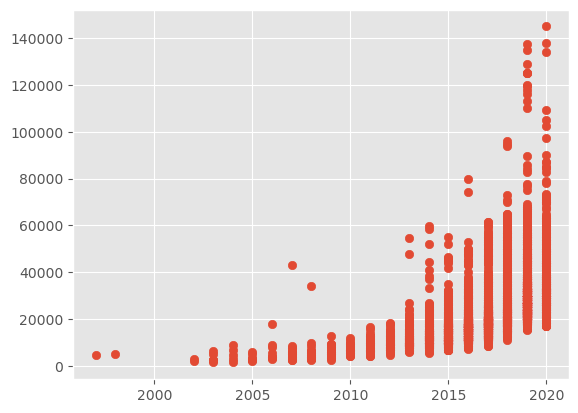

In [20]:
np.set_printoptions(threshold=np.inf)
# print(predictions)

p = 'mileage'
pyplot.style.use("ggplot")
# pyplot.scatter(data[p], data["price"])
# pyplot.xlabel(p)
# pyplot.ylabel("Price")
pyplot.scatter(data['year'],data['price'])
pyplot.show()


